In [1]:
import mysql.connector
from mysql.connector import Error

def retrieve_plate():
    try:
        print("Trying to connect to database.")
        connection = mysql.connector.connect(
            host='localhost',
            port=3306,
            database='constructal_automate_results',
            user='constructal_automate',
            password='constructal_design_2024'
        )
        
        if connection.is_connected():
            print("Connected to database successfully.")
            cursor = connection.cursor()
            
            # Query SQL
            query = """
                SELECT id FROM csg_stiffenedplate sp
            """
            
            # Executa a query
            cursor.execute(query)
            
            # Busca todos os resultados
            results = cursor.fetchall()
            
            # Extrai os ids para a lista stiffened_plates_to_analyse
            plates_to_analyse = [row[0] for row in results]
            
            print(f" {len(plates_to_analyse)} Found IDs: {plates_to_analyse}")
            return plates_to_analyse
            
    except Error as e:
        print(f"Unable to connect to database: {e}")
    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            print("Database connection closed.")

# Chama a função
plates_to_analyse = retrieve_plate()


Trying to connect to database.
Connected to database successfully.
 129 Found IDs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129]
Database connection closed.


In [2]:
import requests
from requests.auth import HTTPBasicAuth
import time
import pandas as pd

# Configurações da API
STIFFENED_PLATE_ANALYSIS_BASE_URL = 'http://127.0.0.1:8000/stiffened-plate-analysis/'
ELASTIC_BUCKLING_BASE_URL = 'http://127.0.0.1:8000/elastic-buckling/'
ELASTO_PLASTIC_BUCKLING_BASE_URL = 'http://127.0.0.1:8000/elasto-plastic-buckling/'
USERNAME = 'andreiflancanova'
PASSWORD = 'teste1234'

# Função genérica para fazer uma requisição POST e medir o tempo
def make_request(url, request_body, context):
    try:
        start_time = time.time()  # Medir tempo de início

        response = requests.post(url, json=request_body, auth=HTTPBasicAuth(USERNAME, PASSWORD))
        response_json = response.json()

        duration = time.time() - start_time  # Duração da requisição

        # Tratamento de erros de resposta HTTP
        if response.status_code == 201:
            id = response_json.get("id")
            print(f"{response_json}")
            print("\n")
            return id, duration
        elif response.status_code == 400:
            print(f"Erro de validação")
            print(f"Request Body: {request_body}")
            print(f"Status Code: {response.status_code}")
            print("Response: \n")
            print(f"{response_json}")
            return None, duration
        elif response.status_code == 401:
            print(f"{context}: Falha na autenticação. Verifique suas credenciais.")
            return None, duration
        else:
            print("Erro inesperado na requisição")
            print(f"Request Body: {request_body}")
            print(f"Status Code: {response.status_code}")
            print("Response: \n")
            print(f"{response_json}")
            return None, duration
    except requests.exceptions.RequestException as e:
        print(f"{context}: Erro de conexão ou de requisição: {e}")
        return None, None

# Funções específicas para cada tipo de requisição
def generate_stiffened_plate_analysis(mesh_size, buckling_load_type, case_study, material, stiffened_plate_id):
    request_body = {
        "mesh_size": mesh_size,
        "buckling_load_type": buckling_load_type,
        "case_study": case_study,
        "material": material,
        "stiffened_plate": stiffened_plate_id
    }
    return make_request(STIFFENED_PLATE_ANALYSIS_BASE_URL, request_body, "STIFFENED_PLATE_ANALYSIS")

def generate_elastic_buckling(stiffened_plate_analysis_id):
    request_body = {
        "stiffened_plate_analysis": stiffened_plate_analysis_id
    }
    return make_request(ELASTIC_BUCKLING_BASE_URL, request_body, "ELASTIC_BUCKLING")

def generate_elasto_plastic_buckling(stiffened_plate_analysis_id):
    request_body = {
        "stiffened_plate_analysis": stiffened_plate_analysis_id
    }
    return make_request(ELASTO_PLASTIC_BUCKLING_BASE_URL, request_body, "ELASTO_PLASTIC_BUCKLING")

# Função principal para realizar as três requisições em sequência e gerar a planilha
def execute_analises(mesh_size, buckling_load_type, case_study, material, stiffened_plate_id_list):
    for stiffened_plate_id in stiffened_plate_id_list:
        # Executar as três requisições e capturar tempos
        
        print("STIFFENED PLATE ANALYSIS")
        id_spa, elapsed_time_spa = generate_stiffened_plate_analysis(mesh_size, buckling_load_type, case_study, material, stiffened_plate_id)
        
        print("ELASTIC BUCKLING")
        id_eb, elapsed_time_eb = generate_elastic_buckling(id_spa)
        
        print("ELASTO-PLASTIC BUCKLING")
        id_epb, elapsed_time_epb = generate_elasto_plastic_buckling(id_spa)

In [5]:
#mesh_size_list = [100, 75, 50, 40, 25, 20, 15, 10]
mesh_size = 25
buckling_load_type = 2
case_study = 'ec_2a_2_2_phi_0.3_lancanova_2024'
material = 1

In [6]:
print(plates_to_analyse)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129]


In [7]:
execute_analises(mesh_size, buckling_load_type, case_study, material, plates_to_analyse)

STIFFENED PLATE ANALYSIS
{'id': 1, 'mesh_size': '25.0', 'num_elem': 3200, 'case_study': 'ec_2a_2_2_phi_0.3_lancanova_2024', 'analysis_dir_path': 'D:/constructal_automate_analysis_files/ec_2a_2_2_phi_0.3_lancanova_2024/BL2M1P0L0T0_k0_MS25_SP1', 'analysis_rst_file_path': None, 'analysis_lgw_file_path': 'D:/constructal_automate_analysis_files/ec_2a_2_2_phi_0.3_lancanova_2024/BL2M1P0L0T0_k0_MS25_SP1/BL2M1P0L0T0_k0_MS25_SP1.txt', 'material': 1, 'stiffened_plate': 1, 'buckling_load_type': 2, 'elastic_buckling_status': 1, 'elasto_plastic_buckling_status': 1}


ELASTIC BUCKLING
{'id': 1, 'n_cr': '646.71', 'sigma_cr': '46.19', 'w_center': '1.0000', 'stiffened_plate_analysis': 1}


ELASTO-PLASTIC BUCKLING
{'id': 1, 'p_u': '4970.00', 'n_u': '835.58', 'sigma_u': '59.68', 'w_max': '38.0533', 'w_dist_img_path': 'D:/constructal_automate_analysis_files/ec_2a_2_2_phi_0.3_lancanova_2024/BL2M1P0L0T0_k0_MS25_SP1/BL2M1P0L0T0_k0_MS25_SP1_w_dist.png', 'von_mises_dist_img_path': 'D:/constructal_automate_analy

In [6]:
import mysql.connector
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np
from decimal import Decimal
from matplotlib.ticker import AutoMinorLocator, FuncFormatter,MultipleLocator

# 1. Conectar ao banco de dados MySQL
con = mysql.connector.connect(
    host="localhost",        
    user="constructal_automate",     
    password="constructal_design_2024",    
    database="constructal_automate_results"
)

cur = con.cursor()

query = f'''
SELECT sp.id, sp.k, epb.sigma_u FROM constructal_automate_results.cbeb_elastoplasticbuckling as epb
INNER JOIN constructal_automate_results.cbeb_stiffenedplateanalysis as spa on epb.stiffened_plate_analysis_id=spa.id
INNER JOIN constructal_automate_results.csg_stiffenedplate as sp on spa.stiffened_plate_id=sp.id
WHERE spa.buckling_load_type_id = 2 and epb.id not between 259 and 266;
'''
cur.execute(query)
dados_flambagem = cur.fetchall()

# Fechar a conexão com o banco de dados
con.close()

globals()['caso_ref_2a'] = dados_flambagem[0]

tensao_placa_ref = dados_flambagem[0][2]
print('Tensão da Placa de Referência: ', tensao_placa_ref)

start_index = 1
end_index = 9

# Laço para criar as variáveis "caso_X_Y_2a"
for N_ls in range(2, 6):      # X varia de 2 a 5
    for N_ts in range(2, 6):  # Y varia de 2 a 5
        nome = f"caso_{N_ls}_{N_ts}_2a"
        globals()[nome] = dados_flambagem[start_index:end_index]
        array_atual = globals()[nome]

        array_atual = [(linha[0], linha[1], (linha[2]/tensao_placa_ref)) for linha in array_atual]

        globals()[nome] = array_atual

        print('\n')
        print('------------------------------------------------------------')
        print('N_ls = ', N_ls, '; N_ts = ', N_ts)
        print('------------------------------------------------------------')
        print(array_atual)
        
        start_index += 8
        end_index += 8

Tensão da Placa de Referência:  59.68


------------------------------------------------------------
N_ls =  2 ; N_ts =  2
------------------------------------------------------------
[(2, Decimal('56.200'), Decimal('0.4284517426273458445040214477')), (3, Decimal('14.100'), Decimal('3.287198391420911528150134048')), (4, Decimal('6.333'), Decimal('3.543063002680965147453083110')), (5, Decimal('3.550'), Decimal('3.670911528150134048257372654')), (6, Decimal('2.280'), Decimal('3.709617962466487935656836461')), (7, Decimal('1.600'), Decimal('3.665549597855227882037533512')), (8, Decimal('1.171'), Decimal('3.040717158176943699731903485')), (9, Decimal('0.900'), Decimal('2.585623324396782841823056300'))]


------------------------------------------------------------
N_ls =  2 ; N_ts =  3
------------------------------------------------------------
[(10, Decimal('42.200'), Decimal('0.7324061662198391420911528150')), (11, Decimal('10.600'), Decimal('3.709785522788203753351206434')), (12, Decim

In [7]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np
from decimal import Decimal
from matplotlib.ticker import AutoMinorLocator, FuncFormatter,MultipleLocator, FormatStrFormatter
import matplotlib.ticker as ticker
import locale
locale.setlocale(locale.LC_NUMERIC, 'pt_BR.UTF-8')

plt.rcParams['axes.formatter.use_locale'] = True
plt.rcParams['font.family'] = 'Lucida Sans'

min_k = 0
max_k = 60

min_sigma_u = 0
max_sigma_u = 6

k_data_ref = list(range(0, 61, 5))
sigma_u_2a_ns_data = [1 for _ in range(len(k_data_ref))]

def generate_constructal_design_plots(N_ls, N_ts, k_data, sigma_u_2a_sp_data):   
    fig, ax = plt.subplots(figsize=(8, 6))

    formatter = ticker.FuncFormatter(lambda x, _: f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
    ax.yaxis.set_major_formatter(formatter)
    
    # ax.plot(k_data, sigma_u_2a_sp_data, '-o', color='#d84528', lw=2, markersize=4, label=rf'$NUS_{{2A}} - P({N_ls},{N_ts})$')
    # ax.plot(k_data, sigma_u_2a_sp_data, '-o', color='#d84528', lw=2, markersize=4, label=rf'$NUS_{{2A}} \;(\; N_{{ls}} = {N_ls}, N_{{ts}} = {N_ts})$')
    ax.plot(k_data, sigma_u_2a_sp_data, '-o', color='#d84528', lw=2, markersize=4, label=rf'$Com\;Enrijecedores\;(N_{{ls}} = {N_ls}, N_{{ts}} = {N_ts})$')
    # ax.plot(k_data, sigma_u_2a_ns_data, color='#eb8e27', lw=2, linestyle='--', marker='', label=rf'$NUS_{{2A,ref}}$')
    ax.plot(k_data_ref, sigma_u_2a_ns_data, color='#eb8e27', lw=2, linestyle='--', marker='', label=rf'$Sem\;Enrijecedores$')
    
    ax.set_xlabel(rf'$h_{{s}}/t_{{s}}$', fontsize=18)
    ax.set_ylabel(rf'$NUS_{{2A}}$', fontsize=18)
    ax.legend(loc='upper right', fontsize=14)
    
    ax.grid(True, which='major', linestyle='-', linewidth=0.25, color='gray')  # Grade principal
    ax.grid(True, which='minor', linestyle='--', linewidth=0.25, color='lightgray')  # Grade secundária
    
    
    ax.set_xlim([min_k, max_k])
    ax.set_ylim([min_sigma_u, max_sigma_u])
    
    # Configurar os locators de forma explícita
    ax.xaxis.set_major_locator(MultipleLocator(10))  # Ticks principais no eixo X
    ax.xaxis.set_minor_locator(MultipleLocator(2))   # Ticks menores no eixo X
    
    ax.yaxis.set_major_locator(MultipleLocator(1))   # Ticks principais no eixo Y
    ax.yaxis.set_minor_locator(MultipleLocator(0.2)) # Ticks menores no eixo Y
    ax.tick_params(axis='both', labelsize=18)
    
    # plt.savefig(f'graficos_design_construtal/grafico-L{N_ls}-T{N_ts}-phi-0.3.png')
    plt.savefig(f'graficos_dc_nus/grafico_L{N_ls}_T{N_ts}_phi_0.3.png')
    
    # Exibir o gráfico
    # plt.show()

N_ls = 2 , N_ts = 2


------------------------------------------------------------
N_ls =  2 ; N_ts =  2
------------------------------------------------------------
k_data =  (Decimal('56.200'), Decimal('14.100'), Decimal('6.333'), Decimal('3.550'), Decimal('2.280'), Decimal('1.600'), Decimal('1.171'), Decimal('0.900'))
------------------------------------------------------------
sigma_u_2a_sp_data =  (Decimal('0.4284517426273458445040214477'), Decimal('3.287198391420911528150134048'), Decimal('3.543063002680965147453083110'), Decimal('3.670911528150134048257372654'), Decimal('3.709617962466487935656836461'), Decimal('3.665549597855227882037533512'), Decimal('3.040717158176943699731903485'), Decimal('2.585623324396782841823056300'))
------------------------------------------------------------
N_ls = 2 , N_ts = 3


------------------------------------------------------------
N_ls =  2 ; N_ts =  3
------------------------------------------------------------
k_data =  (Decimal('42.200'),

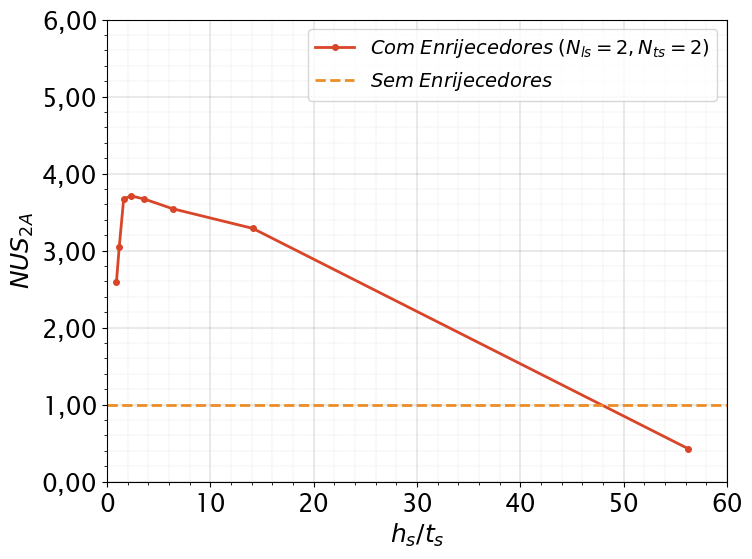

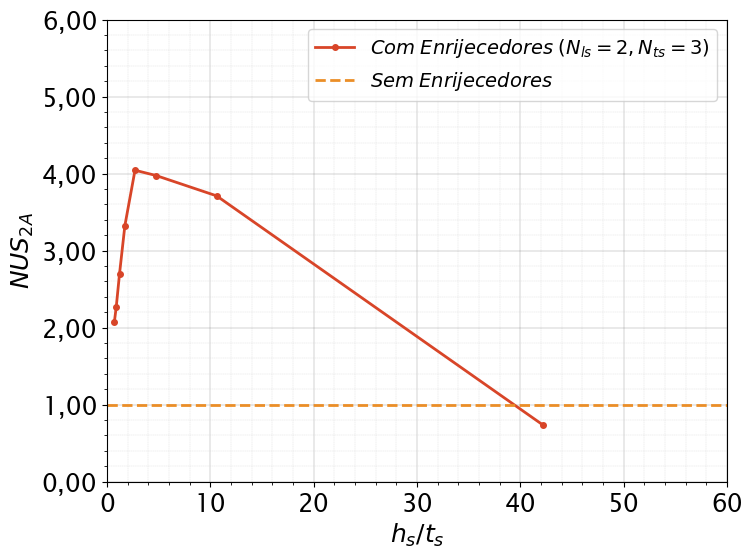

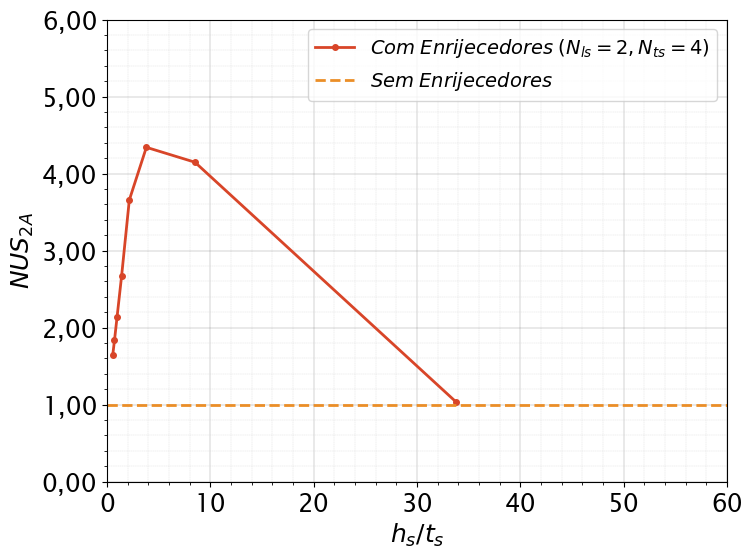

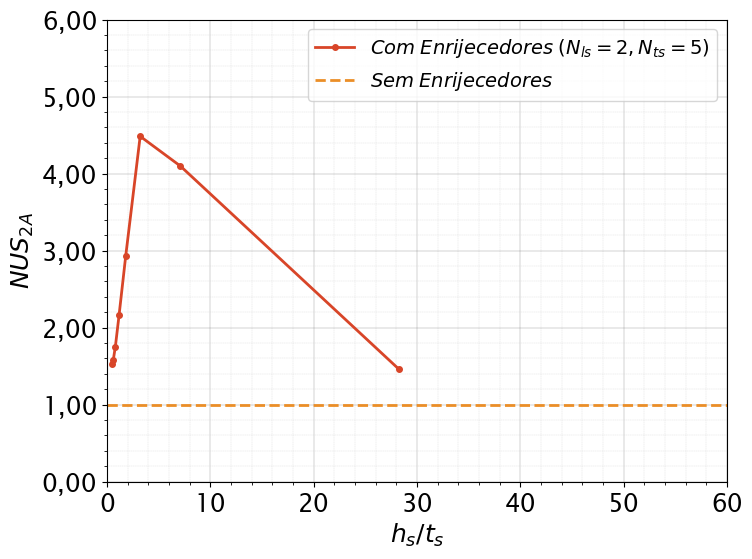

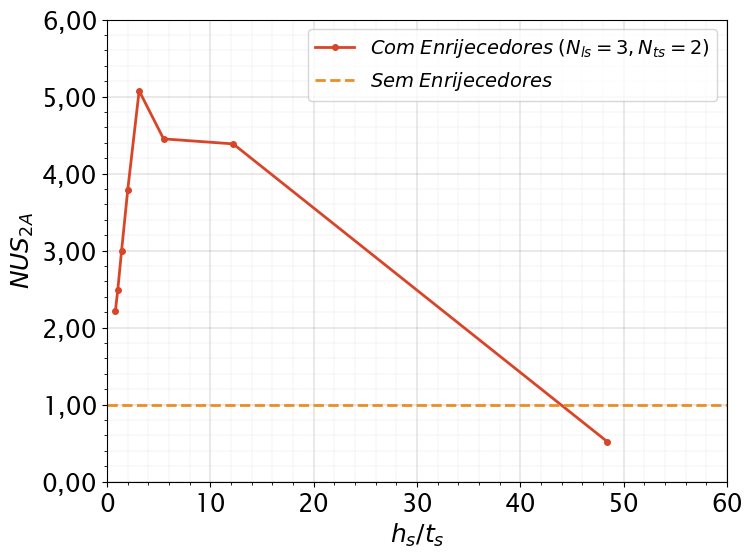

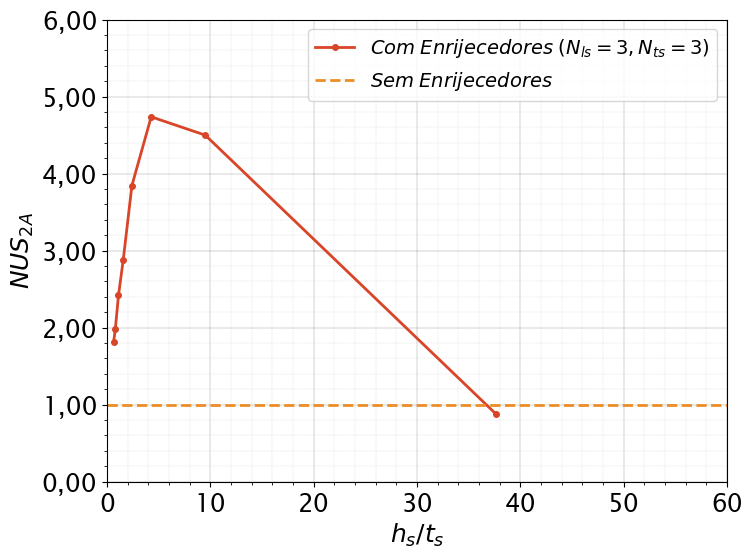

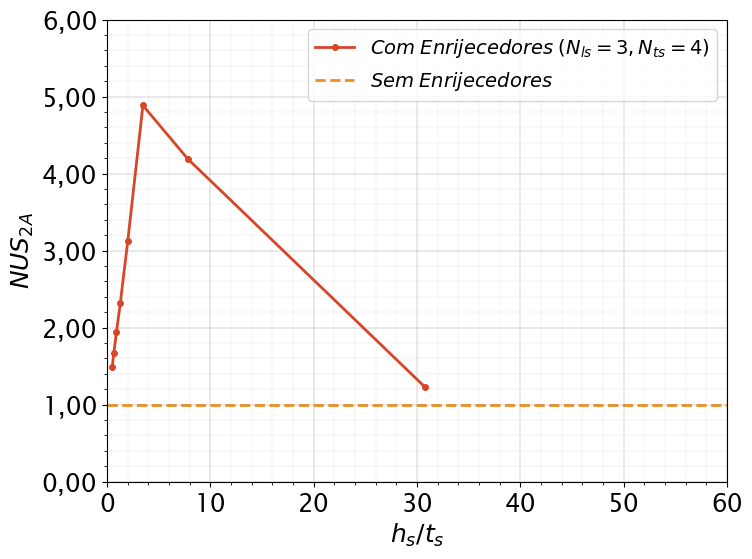

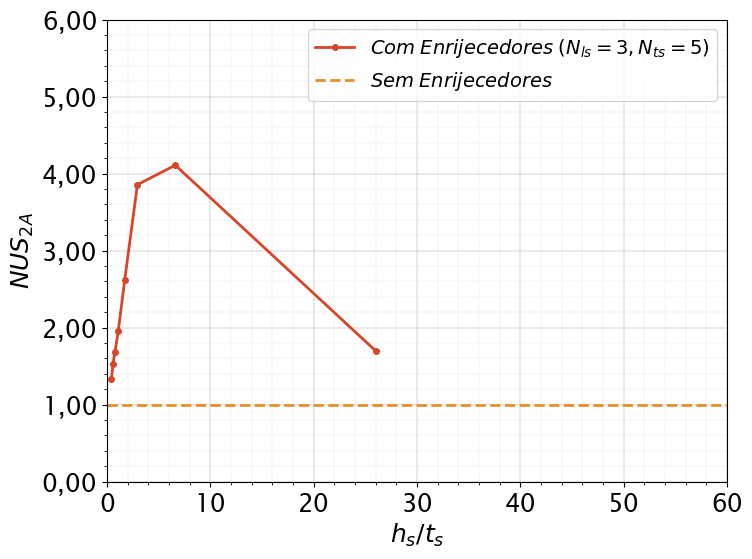

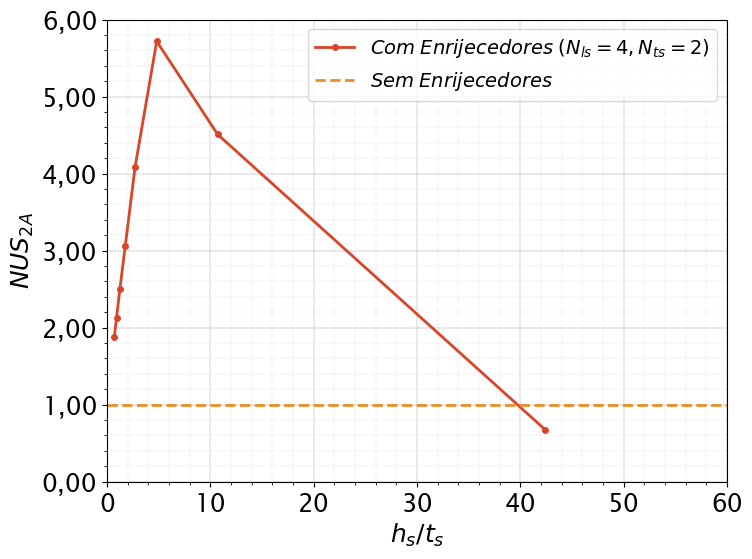

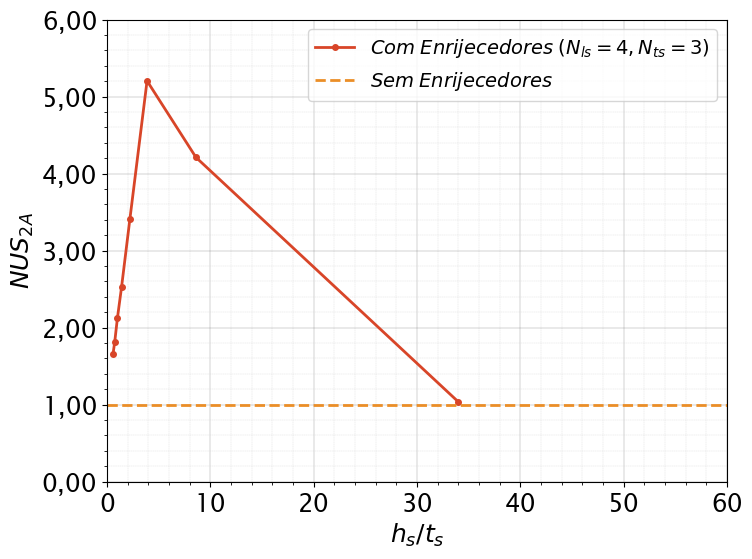

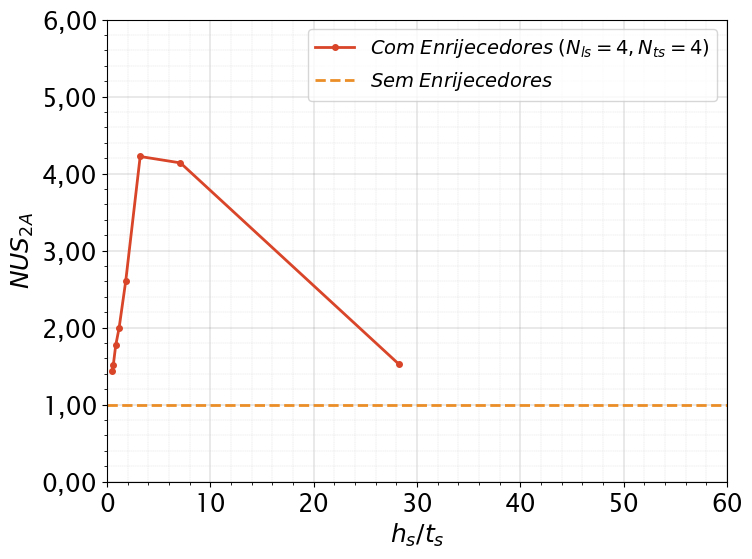

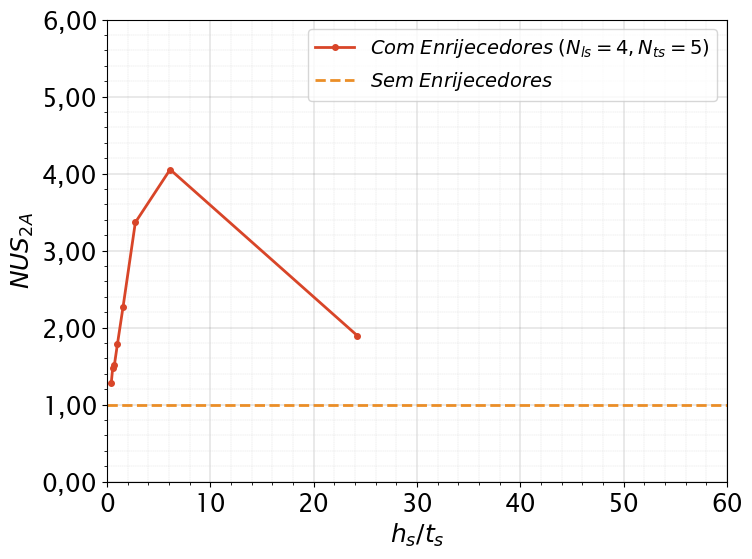

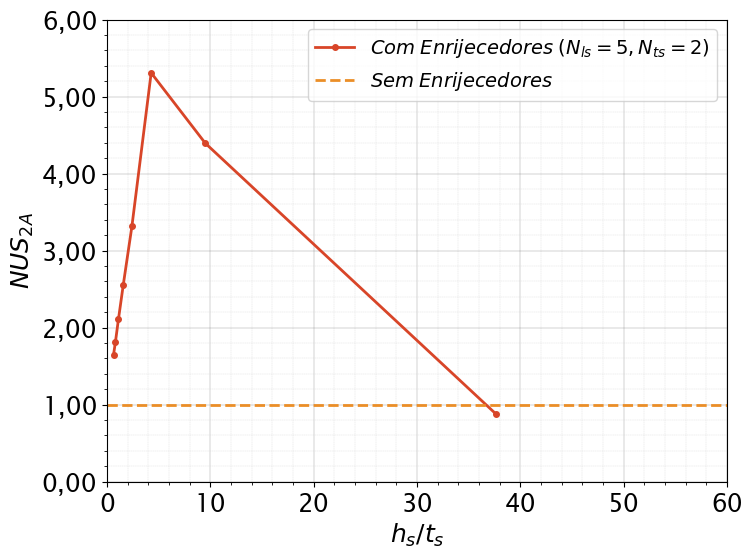

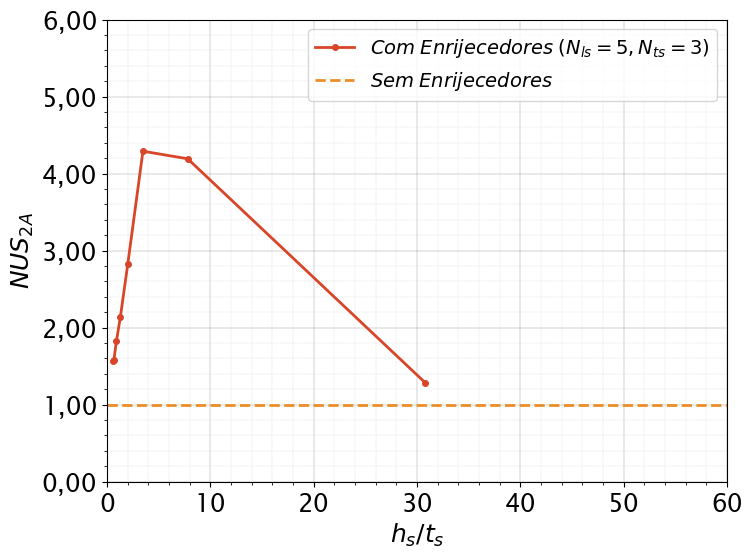

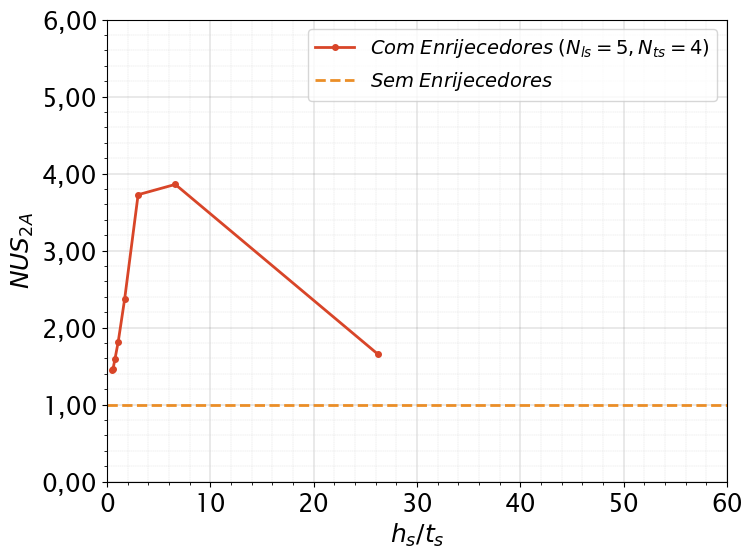

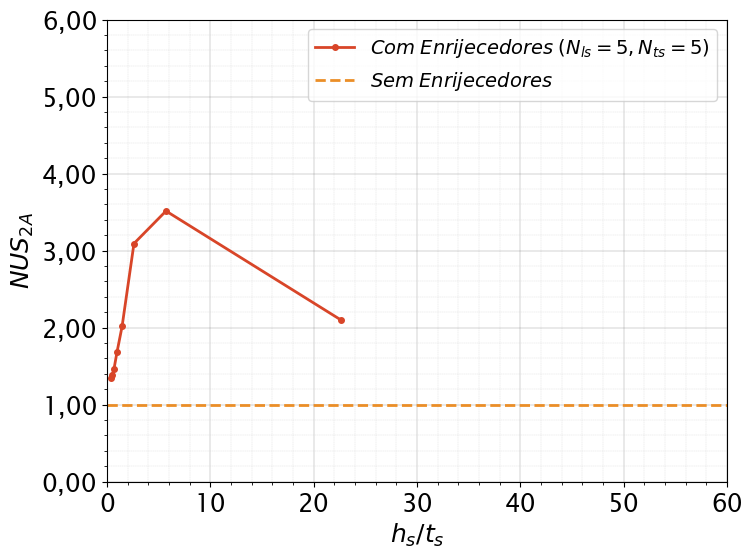

In [8]:
'''
[0] sp.id
[1] sp.k
[2] epb.sigma_u
'''

for N_ls in range(2, 6):
    for N_ts in range(2, 6):
        nome = f"caso_{N_ls}_{N_ts}_2a"
        k_data, sigma_u_2a_sp_data = zip(*[(obj[1], obj[2]) for obj in globals()[nome]])
        print(f'N_ls = {N_ls} , N_ts = {N_ts}')

        print('\n')
        print('------------------------------------------------------------')
        print('N_ls = ', N_ls, '; N_ts = ', N_ts)
        print('------------------------------------------------------------')
        print('k_data = ', k_data)
        print('------------------------------------------------------------')
        print('sigma_u_2a_sp_data = ', sigma_u_2a_sp_data)
        print('------------------------------------------------------------')
        generate_constructal_design_plots(N_ls, N_ts, k_data, sigma_u_2a_sp_data)
#print(caso_2_3_2a)
#k_usar,sigma_usar = zip(*[(obj[1], obj[2]) for obj in caso_2_3_2a])

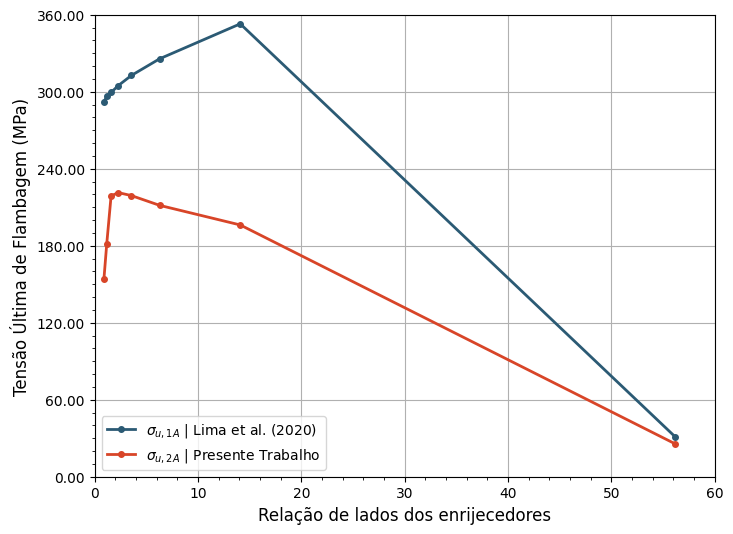

In [46]:
min_k = 0
max_k = 60

min_sigma_u = 0
max_sigma_u = 360
          
# Criar o gráfico
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(k_data, sigma_u_1a_data, '-o', color='#2b5a74', lw=2, markersize=4, label=r'$\sigma_{u,1A}$ | Lima et al. (2020)')
ax.plot(k_data, sigma_u_2a_data, '-o', color='#d84528', lw=2, markersize=4, label=r'$\sigma_{u,2A}$ | Presente Trabalho')

# Configurar rótulos dos eixos e legenda
ax.set_xlabel(r'Relação de lados dos enrijecedores', fontsize=12)
# ax.set_ylabel(r'$\sigma_{u,1A}$', fontsize=12)
ax.set_ylabel('Tensão Última de Flambagem (MPa)', fontsize=12)
ax.legend(loc='lower left')

# Adicionar a malha ao gráfico
ax.grid(True)

# Definir os limites dos eixos, se necessário
ax.set_xlim([min_k, max_k])  # Limites do eixo X
ax.set_ylim([min_sigma_u, max_sigma_u])  # Limites do eixo Y

# ax.grid(True, linestyle='--', linewidth=0.5, which='major')  # Grade principal
# ax.grid(True, linestyle=':', linewidth=0.3, which='minor')   # Grade secundária

ax.yaxis.set_major_locator(MultipleLocator(60))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(6))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Salvar o gráfico com o timestamp e valores de N_ls e N_ts no nome do arquivo
plt.savefig(f'resultados_artigo_mcsul2024/ec-comparacao-sigma-u-1a-2a.png')

# Exibir o gráfico
plt.show()

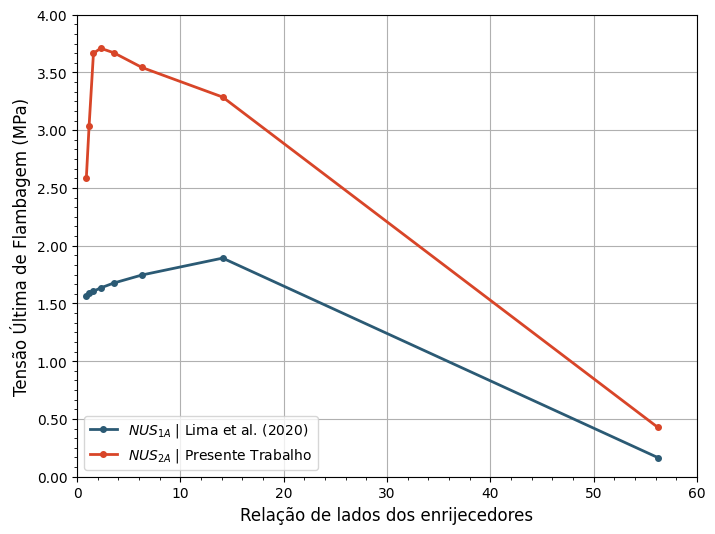

In [51]:
min_k = 0
max_k = 60

min_sigma_u = 0
max_sigma_u = 4
          
# Criar o gráfico
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(k_data, nus_1a, '-o', color='#2b5a74', lw=2, markersize=4, label=r'$NUS_{1A}$ | Lima et al. (2020)')
ax.plot(k_data, nus_2a, '-o', color='#d84528', lw=2, markersize=4, label=r'$NUS_{2A}$ | Presente Trabalho')

# Configurar rótulos dos eixos e legenda
ax.set_xlabel(r'Relação de lados dos enrijecedores', fontsize=12)
# ax.set_ylabel(r'$\sigma_{u,1A}$', fontsize=12)
ax.set_ylabel('Tensão Última de Flambagem (MPa)', fontsize=12)
ax.legend(loc='lower left')

# Adicionar a malha ao gráfico
ax.grid(True)

# Definir os limites dos eixos, se necessário
ax.set_xlim([min_k, max_k])  # Limites do eixo X
ax.set_ylim([min_sigma_u, max_sigma_u])  # Limites do eixo Y

# ax.grid(True, linestyle='--', linewidth=0.5, which='major')  # Grade principal
# ax.grid(True, linestyle=':', linewidth=0.3, which='minor')   # Grade secundária

ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(6))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Salvar o gráfico com o timestamp e valores de N_ls e N_ts no nome do arquivo
plt.savefig(f'resultados_artigo_mcsul2024/ec-comparacao-nus-1a-2a.png')

# Exibir o gráfico
plt.show()

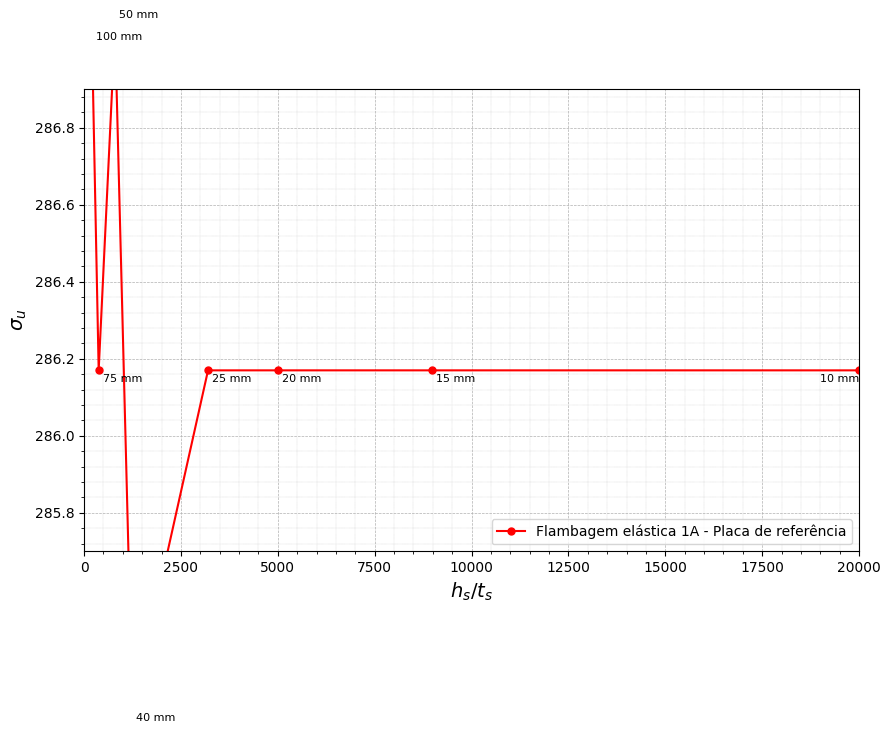

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from decimal import Decimal

# Dados de exemplo que você obtém da sua consulta SQL
# Suponha que 'elem_data' e 'sigma_u_data' já estejam preenchidos com dados do banco
# elem_data = [100, 500, 1000, 2000, 4000, 8000, 16000, 20000]  # Exemplo de dados
# sigma_u_data = [286.5, 286.8, 286.9, 286.95, 287, 287, 286.9, 286.85]  # Exemplo de dados

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Configurar a linha principal e os marcadores
ax.plot(elem_data, sigma_u_data, label='Flambagem elástica 1A - Placa de referência', color='red', marker='o', linestyle='-', markersize=5)
ax.set_xlabel(r'$h_{s}/t_{s}$', fontsize=14)
ax.set_ylabel(r'$\sigma_{u}$', fontsize=14)

# Adicionar rótulos aos marcadores com deslocamento
for x, y, label in zip(elem_data, sigma_u_data, labels):
    if x == elem_data[2]:
        ax.text(x + 100, y + Decimal(0.02), f'{label:.0f} mm', fontsize=8, ha='left', va='bottom')  # Ajuste de posição dos rótulos
    elif x == elem_data[-1]:
        ax.text(x - 1000, y - Decimal(0.01), f'{label:.0f} mm', fontsize=8, ha='left', va='top')  # Ajuste de posição dos rótulos
    else:
        ax.text(x + 100, y - Decimal(0.01), f'{label:.0f} mm', fontsize=8, ha='left', va='top')  # Ajuste de posição dos rótulos

# Configurações do gráfico
ax.legend(loc='lower right', fontsize=10)
ax.grid(True, linestyle='--', linewidth=0.5, which='major')  # Grade principal
ax.grid(True, linestyle=':', linewidth=0.3, which='minor')   # Grade secundária

ax.xaxis.set_minor_locator(AutoMinorLocator(5))  # Linhas secundárias em X (dividir em 4)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))  # Linhas secundárias em Y (dividir em 4)

ax.set_xlim([0, 20000])  # Limites do eixo X
ax.set_ylim([285.7, 286.9])  # Limites do eixo Y

# Exibir o gráfico
plt.show()


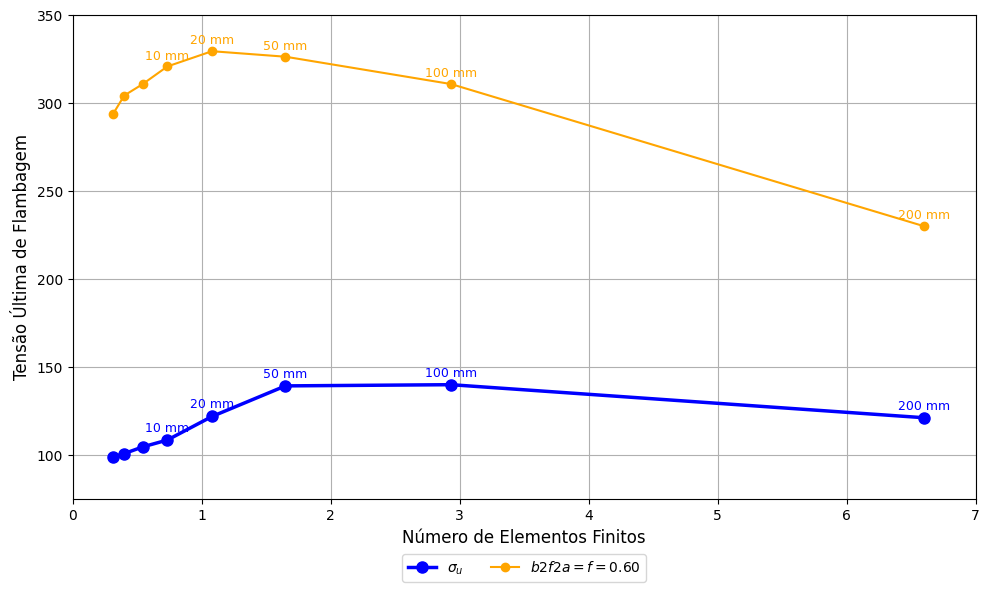

In [108]:
import matplotlib.pyplot as plt

# Dados de exemplo
eixo_x =  [6.6, 2.934, 1.65, 1.08, 0.734, 0.543, 0.4, 0.312]
eixo_y_andrei = [121.28,140.06,139.38,121.99,108.61,104.70,100.91,98.83]
eixo_y_lima = [230.13,310.92,326.47,329.60,320.93,310.91,304.42,293.78]

# Criando a figura
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando as linhas com estilos e rótulos
ax.plot(eixo_x, eixo_y_andrei, '-o', color='blue', lw=2.5, markersize=8, label=r'$\sigma_{u}$')
ax.plot(eixo_x, eixo_y_lima, '-o', color='orange', lw=1.5, markersize=6, label=r'$b2f2a=f=0.60$')
# ax.plot(eixo_x, tensao_b2f2a_eq_1_00, '-o', color='gray', lw=1.5, markersize=6, label=r'$b2f2a=f=1.00$')

# Adicionando anotações para cada ponto específico
labels = ['200 mm', '100 mm', '50 mm', '20 mm', '10 mm']
for i, txt in enumerate(labels):
    ax.annotate(txt, (eixo_x[i], eixo_y_andrei[i]), textcoords="offset points", xytext=(0,6), ha='center', color='blue', fontsize=9)
    ax.annotate(txt, (eixo_x[i], eixo_y_lima[i]), textcoords="offset points", xytext=(0,5), ha='center', color='orange', fontsize=9)
#     ax.annotate(txt, (num_elementos[i], tensao_b2f2a_eq_1_00[i]), textcoords="offset points", xytext=(0,5), ha='center', color='gray', fontsize=9)

# Configurações dos eixos
ax.set_xlabel('Número de Elementos Finitos', fontsize=12)
ax.set_ylabel('Tensão Última de Flambagem', fontsize=12)
ax.set_ylim(75, 350)
ax.set_xlim(0, 7)

# Exibindo a legenda na parte inferior
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=10)

# Adicionando a grade
plt.grid(True)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

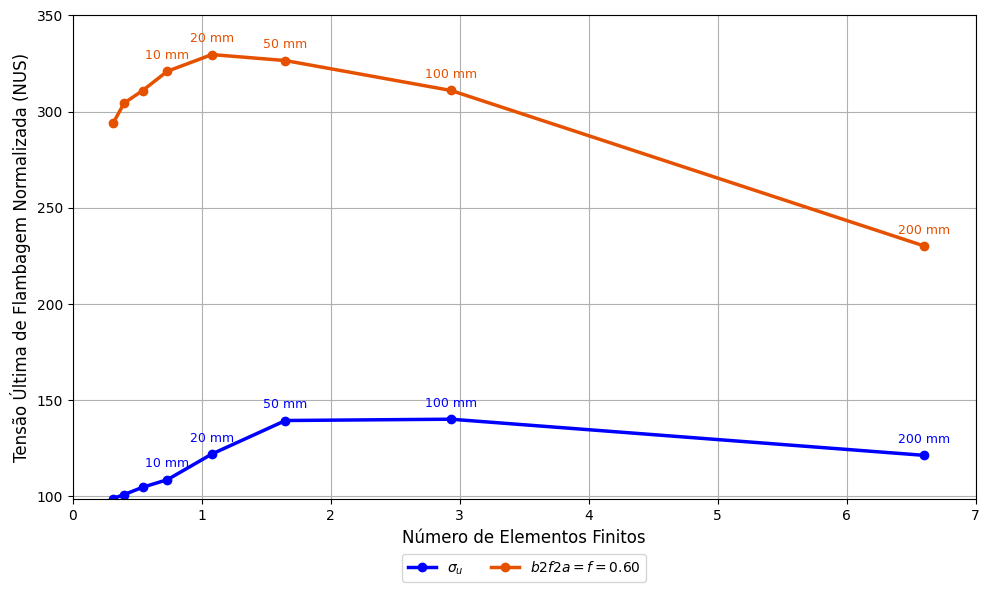

In [12]:
import matplotlib.pyplot as plt

# Dados de exemplo
eixo_x =  [6.6, 2.934, 1.65, 1.08, 0.734, 0.543, 0.4, 0.312]
eixo_y_andrei = [121.28,140.06,139.38,121.99,108.61,104.70,100.91,98.83]
eixo_y_lima = [230.13,310.92,326.47,329.60,320.93,310.91,304.42,293.78]

# Criando a figura
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando as linhas com estilos e rótulos
ax.plot(eixo_x, eixo_y_andrei, '-o', color='blue', lw=2.5, markersize=6, label=r'$\sigma_{u}$')
ax.plot(eixo_x, eixo_y_lima, '-o', color='#e65100', lw=2.5, markersize=6, label=r'$b2f2a=f=0.60$')
# ax.plot(eixo_x, tensao_b2f2a_eq_1_00, '-o', color='gray', lw=1.5, markersize=6, label=r'$b2f2a=f=1.00$')

# Adicionando anotações para cada ponto específico
labels = ['200 mm', '100 mm', '50 mm', '20 mm', '10 mm']
for i, txt in enumerate(labels):
    ax.annotate(txt, (eixo_x[i], eixo_y_andrei[i]), textcoords="offset points", xytext=(0,9), ha='center', color='blue', fontsize=9)
    ax.annotate(txt, (eixo_x[i], eixo_y_lima[i]), textcoords="offset points", xytext=(0,9), ha='center', color='#e65100', fontsize=9)
#     ax.annotate(txt, (num_elementos[i], tensao_b2f2a_eq_1_00[i]), textcoords="offset points", xytext=(0,5), ha='center', color='gray', fontsize=9)

# Configurações dos eixos
ax.set_xlabel('Número de Elementos Finitos', fontsize=12)
ax.set_ylabel('Tensão Última de Flambagem Normalizada (NUS)', fontsize=12)
ax.set_ylim(98.5, 350)
ax.set_xlim(0, 7)

# Exibindo a legenda na parte inferior
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=10)

# Adicionando a grade
plt.grid(True)

# Exibindo o gráfico
plt.tight_layout()
plt.show()